In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/CoverLetterGenerator/data'

# List files in the 'data' folder
import os
os.listdir(data_path)


['.DS_Store', 'clean', 'raw']

In [3]:
import pandas as pd
raw_path = '/content/drive/MyDrive/CoverLetterGenerator/data/raw'

# Load CVs
df_cv = pd.read_csv(raw_path + '/CV_Extracted.csv')

# Load Job Descriptions
df_job = pd.read_csv(raw_path + '/JobDescription.csv')

print("CVs Loaded:", len(df_cv))
print("Jobs Loaded:", len(df_job))

# Inspect first CV and Job
print(df_cv.head())
print(df_job.head())

CVs Loaded: 1636
Jobs Loaded: 2277
              Name                      Email  \
0  Gregory Bennett  gregory.bennett@gmail.com   
1  Gregory Bennett  gregory.bennett@gmail.com   
2     Jasmine Bell     jasmine.bell@gmail.com   
3    Linda Johnson    linda.johnson@gmail.com   
4        Ryan Cook        ryan.cook@gmail.com   

                                              Skills  
0  optimize,blockchain,transaction,throughput,40,...  
1  blockchain,technology,web3,javascript,python,g...  
2  blockchain,technology,web3,javascript,python,g...  
3  distribute,system,cryptography,smart,contract,...  
4  distribute,system,cryptography,smart,contract,...  
   Unnamed: 0             Job Title  \
0           0     flutter,developer   
1           1      django,developer   
2           2      machine,learning   
3           3          io,developer   
4           4  full,stack,developer   

                                     Job Description  
0  looking,hire,expert,flutter,developer,eligible.

In [4]:
# Check first rows
print(df_cv.head())
print(df_job.head())

# Basic info
print(df_cv.info())
print(df_job.info())

# Check for missing values
print(df_cv.isnull().sum())
print(df_job.isnull().sum())

# Summary statistics
print(df_cv.describe(include='all'))
print(df_job.describe(include='all'))


              Name                      Email  \
0  Gregory Bennett  gregory.bennett@gmail.com   
1  Gregory Bennett  gregory.bennett@gmail.com   
2     Jasmine Bell     jasmine.bell@gmail.com   
3    Linda Johnson    linda.johnson@gmail.com   
4        Ryan Cook        ryan.cook@gmail.com   

                                              Skills  
0  optimize,blockchain,transaction,throughput,40,...  
1  blockchain,technology,web3,javascript,python,g...  
2  blockchain,technology,web3,javascript,python,g...  
3  distribute,system,cryptography,smart,contract,...  
4  distribute,system,cryptography,smart,contract,...  
   Unnamed: 0             Job Title  \
0           0     flutter,developer   
1           1      django,developer   
2           2      machine,learning   
3           3          io,developer   
4           4  full,stack,developer   

                                     Job Description  
0  looking,hire,expert,flutter,developer,eligible...  
1  python,django,developer,lea

In [5]:
# How many unique candidates?
print("Unique candidates:", df_cv['Name'].nunique())

# Count how many skills each CV has
df_cv['num_skills'] = df_cv['Skills'].apply(lambda x: len(str(x).split(',')))
print(df_cv[['Name', 'num_skills']].head())

# Most common skills
from collections import Counter

all_skills = ','.join(df_cv['Skills'].dropna()).split(',')
all_skills = [s.strip().lower() for s in all_skills]
skill_counts = Counter(all_skills)
print(skill_counts.most_common(20))


Unique candidates: 330
              Name  num_skills
0  Gregory Bennett          15
1  Gregory Bennett          16
2     Jasmine Bell          16
3    Linda Johnson          18
4        Ryan Cook          29
[('management', 476), ('work', 452), ('team', 415), ('data', 403), ('test', 378), ('development', 362), ('system', 333), ('tool', 320), ('python', 299), ('program', 280), ('history', 276), ('sql', 274), ('service', 268), ('process', 264), ('use', 263), ('problem', 258), ('design', 254), ('software', 253), ('plan', 240), ('project', 229)]


In [6]:
# Length of job descriptions
df_job['desc_length'] = df_job['Job Description'].apply(lambda x: len(str(x).split(',')))
print(df_job[['Job Title', 'desc_length']])

# Most common words in job descriptions
all_job_words = ','.join(df_job['Job Description'].dropna()).split(',')
all_job_words = [w.strip().lower() for w in all_job_words]
job_word_counts = Counter(all_job_words)
print(job_word_counts.most_common(30))


                  Job Title  desc_length
0         flutter,developer           56
1          django,developer           56
2          machine,learning          169
3              io,developer          135
4      full,stack,developer          405
...                     ...          ...
2272      backend,developer          258
2273   full,stack,developer          337
2274  network,administrator           50
2275       machine,learning          170
2276   full,stack,developer          119

[2277 rows x 2 columns]
[('experience', 9810), ('work', 4903), ('year', 4653), ('development', 4191), ('team', 3750), ('application', 3542), ('skill', 3324), ('knowledge', 3226), ('design', 3086), ('software', 2981), ('technology', 2769), ('data', 2752), ('job', 2714), ('system', 2591), ('preferred', 2473), ('service', 2286), ('required', 2149), ('understanding', 2092), ('developer', 2055), ('working', 2008), ('time', 1979), ('web', 1960), ('database', 1866), ('strong', 1864), ('solution', 1820), ('cod

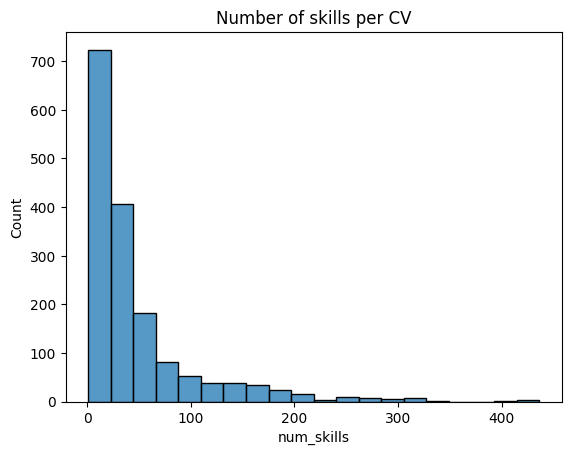

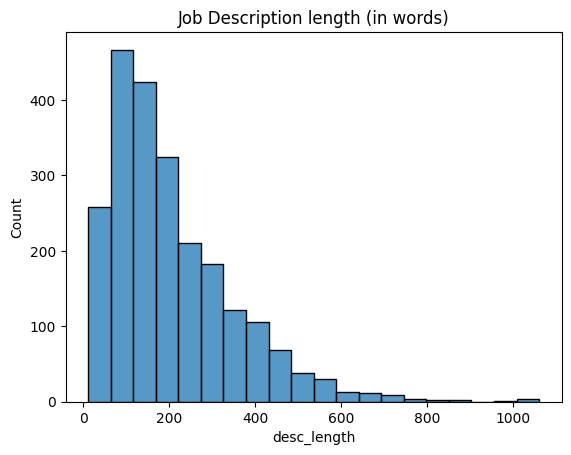

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of number of skills per CV
sns.histplot(df_cv['num_skills'], bins=20)
plt.title("Number of skills per CV")
plt.show()

# Histogram of job description lengths
sns.histplot(df_job['desc_length'], bins=20)
plt.title("Job Description length (in words)")
plt.show()


**Cleaning Steps for CVs**

Remove missing skills:

In [12]:
df_cv = df_cv.dropna(subset=['Skills'])


Lowercase everything:

In [13]:
df_cv['Skills'] = df_cv['Skills'].str.lower()


Remove numbers and special characters:

In [14]:
import re

def clean_skills(text):
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^a-z, ]', '', text)  # remove special chars
    text = ','.join([s.strip() for s in text.split(',') if s.strip() != ''])
    return text

df_cv['Skills'] = df_cv['Skills'].apply(clean_skills)


**Cleaning Steps for Job Descriptions**

In [15]:
df_job['Job Description'] = df_job['Job Description'].str.lower()


In [16]:
def clean_job_desc(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-z, ]', '', text)
    text = ' '.join([w.strip() for w in text.split(',') if w.strip() != ''])
    return text

df_job['Job Description'] = df_job['Job Description'].apply(clean_job_desc)


In [17]:
import pandas as pd
import plotly.express as px
from collections import Counter

# Paths on Google Drive
clean_path = '/content/drive/MyDrive/CoverLetterGenerator/data/clean'

# Save cleaned CVs and Jobs
df_cv.to_csv(clean_path + '/CV_Extracted_Cleaned.csv', index=False)
df_job.to_csv(clean_path + '/JobDescription_Cleaned.csv', index=False)

# Load cleaned data
df_cv = pd.read_csv(clean_path + '/CV_Extracted_Cleaned.csv')
df_job = pd.read_csv(clean_path + '/JobDescription_Cleaned.csv')

# Fill missing skills with empty string
df_cv['Skills'] = df_cv['Skills'].fillna("")

# ------------------------------
# 1. Number of skills per candidate
# ------------------------------
df_cv['num_skills'] = df_cv['Skills'].apply(lambda x: len(x.split(',')) if x else 0)
fig1 = px.histogram(df_cv, x='num_skills', nbins=20,
                    title="Number of Skills per Candidate")
fig1.show()

# ------------------------------
# 2. Most common skills
# ------------------------------
all_skills = ','.join(df_cv['Skills']).split(',')
all_skills = [skill.strip() for skill in all_skills if skill.strip() != '']
skill_counts = Counter(all_skills)
most_common_skills = skill_counts.most_common(20)
skills, counts = zip(*most_common_skills)

fig2 = px.bar(x=skills, y=counts, title="Top 20 Most Common Skills", labels={'x':'Skill','y':'Count'})
fig2.show()

# --------------------------


In [10]:
import pandas as pd
from gpt4all import GPT4All
import time
import os

# === CONFIG ===
MODEL_PATH = "/content/drive/MyDrive/CoverLetterGenerator/models/Meta-Llama-3-8B-Instruct.Q4_0.gguf"
OUTPUT_PATH = "/content/drive/MyDrive/CoverLetterGenerator/output/generated_cover_letters.csv"

# === LOAD MODEL ===
print("🔄 Loading GPT4All model...")
model = GPT4All(MODEL_PATH)
print("✅ Model loaded successfully!\n")

# === LOAD YOUR DATA ===
cv_path = "/content/drive/MyDrive/CoverLetterGenerator/data/clean/CV_Extracted_Cleaned.csv"
job_path = "/content/drive/MyDrive/CoverLetterGenerator/data/clean/JobDescription_Cleaned.csv"

df_cv = pd.read_csv(cv_path)
df_job = pd.read_csv(job_path)

print(f"📄 Loaded {len(df_cv)} CVs and {len(df_job)} job descriptions.\n")

# === CHOOSE WHICH ROWS TO TEST ===
cv_index = 0  # change this to test another CV
job_index = 1  # change this to test another job

cv = df_cv.iloc[cv_index]
job = df_job.iloc[job_index]

print(f"👤 Processing CV #{cv_index+1}: {cv['Name']}")
print(f"💼 Job #{job_index+1}: {job['Job Title']}\n")

# === FORMAT CV & JOB TEXT ===
cv_text = f"""
Name: {cv['Name']}
Email: {cv['Email']}
Skills: {cv['Skills']}
"""

job_title = job['Job Title']
job_description = job['Job Description']

# === CREATE PROMPT ===
prompt = f"""
You are a professional HR assistant.
Write a well-structured, compelling, and personalized cover letter for the following candidate based on the job description.

--- Candidate Details ---
{cv_text}

--- Job Title ---
{job_title}

--- Job Description ---
{job_description}

--- Cover Letter ---
"""

print("📝 Generating personalized cover letter...\n")
start_time = time.time()

# === GENERATE COVER LETTER ===
with model.chat_session():
    cover_letter = model.generate(prompt, max_tokens=600)

end_time = time.time()
print("✅ Cover letter generated!\n")

# === DISPLAY & SAVE ===
print("=== GENERATED COVER LETTER ===\n")
print(cover_letter)
print(f"\n⏱ Time taken: {round(end_time - start_time, 2)} seconds")

# === SAVE TO CSV ===
output_df = pd.DataFrame([{
    "Candidate_Name": cv["Name"],
    "Candidate_Email": cv["Email"],
    "Job_Title": job_title,
    "Generated_Cover_Letter": cover_letter
}])

# Ensure output directory exists
os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

# Append or create file
if os.path.exists(OUTPUT_PATH):
    output_df.to_csv(OUTPUT_PATH, mode="a", header=False, index=False)
else:
    output_df.to_csv(OUTPUT_PATH, index=False)

print(f"\n💾 Cover letter saved successfully to: {OUTPUT_PATH}")


🔄 Loading GPT4All model...
✅ Model loaded successfully!

📄 Loaded 1624 CVs and 2277 job descriptions.

👤 Processing CV #1: Gregory Bennett
💼 Job #2: django,developer

📝 Generating personalized cover letter...

✅ Cover letter generated!

=== GENERATED COVER LETTER ===

Here is a well-structured, compelling, and personalized cover letter for the candidate:

Dear Hiring Manager,

I am thrilled to apply for the Django Developer Lead position at [Company Name]. With my strong background in Python and experience working with API development frameworks like Django and Flask, I believe I would be an excellent fit for this role.

As a meticulous professional with a keen eye for detail, I have honed my skills in optimizing code to significantly reduce gas fees while improving user throughput. My expertise in blockchain transactions has allowed me to develop robust protocols that enhance network performance. These abilities will enable me to effectively handle multiple tasks and deliver high-leve

In [ ]:
import pandas as pd
import time
from datetime import datetime
from gpt4all import GPT4All

# === CONFIG ===
MODEL_PATH = "/content/drive/MyDrive/CoverLetterGenerator/models/Meta-Llama-3-8B-Instruct.Q4_0.gguf"
OUTPUT_PATH = "/content/drive/MyDrive/CoverLetterGenerator/output/generated_cover_letters.csv"

# === LOAD MODEL ===
print("🔄 Loading GPT4All model...")
model = GPT4All(MODEL_PATH)
print("✅ Model loaded successfully!\n")

# === LOAD DATA ===
cv_path = "/content/drive/MyDrive/CoverLetterGenerator/data/clean/CV_Extracted_Cleaned.csv"
job_path = "/content/drive/MyDrive/CoverLetterGenerator/data/clean/JobDescription_Cleaned.csv"

df_cv = pd.read_csv(cv_path)
df_job = pd.read_csv(job_path)
print(f"📄 Loaded {len(df_cv)} CVs and {len(df_job)} job descriptions.\n")

# === SELECT ROWS ===
cv_index = 50
job_index = 10

cv = df_cv.iloc[cv_index]
job = df_job.iloc[job_index]

# === PREPARE TEXT ===
cv_name = cv.get('Name', 'Candidate')
cv_email = cv.get('Email', 'example@email.com')
cv_skills = cv.get('Skills', '')
job_title = job.get('Job Title', 'Unknown Position')
job_description = job.get('Job Description', '')
today = datetime.now().strftime("%B %d, %Y")

# === GENERATE PROMPT ===
prompt = f"""
You are an HR assistant. Write a formal, structured, and personalized cover letter in this exact format:

[Candidate Name]
[Candidate Email]
[Date]

Hiring Manager

Subject: Application for [Job Title] Position

Dear Hiring Manager,

[Body Paragraph 1 – Express interest and match skills to the job.]
[Body Paragraph 2 – Mention experience and achievements.]
[Body Paragraph 3 – Show enthusiasm and close formally.]

Sincerely,
**[Candidate Name]**

Use the following data to personalize the letter:

--- Candidate Details ---
Name: {cv_name}
Email: {cv_email}
Skills: {cv_skills}

--- Job Title ---
{job_title}

--- Job Description ---
{job_description}
"""

# === GENERATE LETTER ===
print(f"👤 Processing CV: {cv_name}")
print(f"💼 Job: {job_title}\n")
print("📝 Generating personalized cover letter...\n")

start_time = time.time()
with model.chat_session():
    cover_letter = model.generate(prompt, max_tokens=700)
end_time = time.time()

print("✅ Cover letter generated!\n")
print("=== GENERATED COVER LETTER ===\n")
print(cover_letter)

# === SAVE TO CSV ===
df_output = pd.DataFrame([{
    "CV_Name": cv_name,
    "Job_Title": job_title,
    "Generated_Cover_Letter": cover_letter.strip(),
    "Date_Generated": today
}])

df_output.to_csv(OUTPUT_PATH, mode='a', index=False, header=False)

print(f"\n💾 Cover letter saved successfully to: {OUTPUT_PATH}")
print(f"⏱ Time taken: {end_time - start_time:.2f} seconds")


🔄 Loading GPT4All model...
✅ Model loaded successfully!

📄 Loaded 1624 CVs and 2277 job descriptions.

👤 Processing CV: Monica Brown
💼 Job: database,administrator

📝 Generating personalized cover letter...

